<a href="https://colab.research.google.com/github/Harsaroop/COMP-3710-Project-2/blob/main/Bias_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import math 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import LogisticRegression as LogR
from sklearn.svm import SVR
import numpy as np
from sklearn.model_selection import train_test_split

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/Harsaroop/COMP-3710-Project-2/main/Bias_correction_ucl%20-%20Copy.csv')
df.round(decimals = 3)
df.drop
df = df.dropna()
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [41]:
x = df[:].drop(['Present_Tmax', 'Date', 'Solar radiation'], axis = 1)
y = df['Present_Tmax']

In [42]:
print(x.shape,y.shape)

(7750, 22) (7750,)


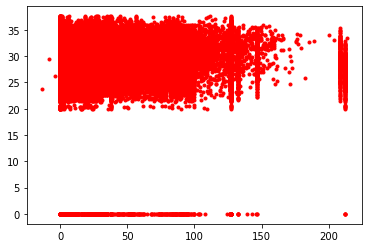

In [43]:
plt.plot(x, y, 'r.')
plt.show()

In [44]:
x_train, x_test, y_train, y_test, = train_test_split(x,y, test_size=0.2)

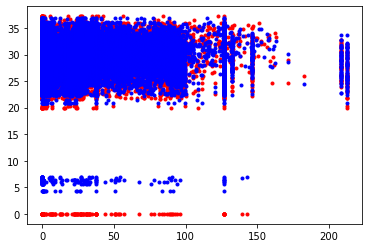

RMSE = 2.013183826350114


In [53]:
#Linear Regression 
regr_LR = LR()
regr_LR.fit(x_train, y_train)

#Mu
#Predicting Temp Max
predict_Tmax = regr_LR.predict(x_test)

#Plotting graph 
plt.plot(x_test, y_test, 'r.')
plt.plot(x_test, predict_Tmax, 'b.')
plt.show()
rmse_lnr = math.sqrt(((y_test - predict_Tmax)**2).mean())
print("RMSE = " + str(rmse_lnr))

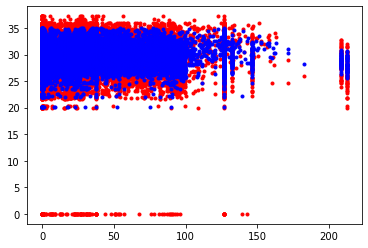

RMSE =  2.7515375929191523


In [52]:
#SVR - Support Vector Regression 
regr_SVR = SVR()
regr_SVR.fit(x_train, y_train)

#Predicting Temp Max 
predict_Tmax = regr_SVR.predict(x_test)

#Plotting Graph
plt.plot(x_test, y_test, 'r.')
plt.plot(x_test, predict_Tmax, 'b.')
plt.show()
rmse_lnr= math.sqrt(((y_test - predict_Tmax)**2).mean())
print("RMSE = ",rmse_lnr)
